**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import nltk

**LOAD & READ DATASET**

In [ ]:
sms=pd.read_csv('spam.csv' , encoding = 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

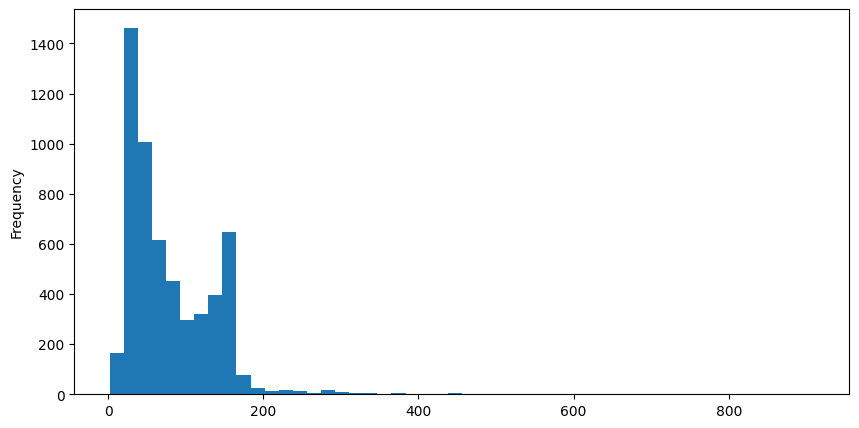

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50,kind='hist',figsize=(10,5))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

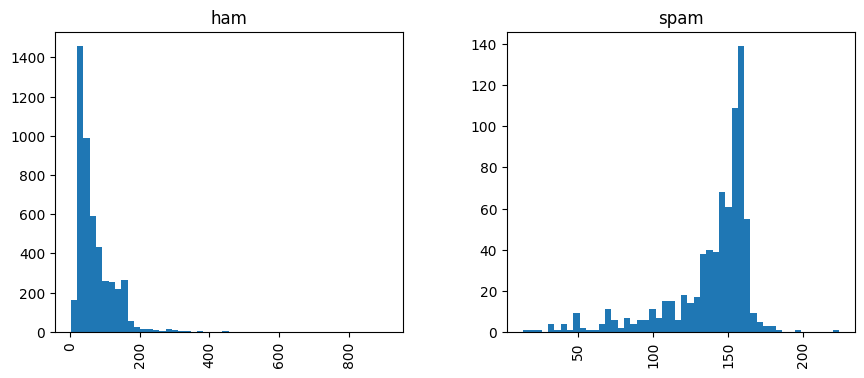

In [ ]:
sms.hist(column='length',by='label',bins=50,figsize=(10,4))

In [ ]:
sms.loc[:,'label']=sms.label.map({'ham':0,'spam':1})
sms.head()

<ipython-input-9-4d40f0632084>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0,'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
text=count.fit_transform(sms['text'])
x_train,x_test,y_train,y_test=train_test_split(text,sms['label'],test_size=0.20,random_state=1)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


**USING MLP CLASSIFIER**

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,y_train)

MLPClassifier()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score : {}".format(accuracy_score(y_test,prediction)))
print("Precision score : {}".format(precision_score(y_test,prediction)))
print("recall score : {}".format(recall_score(y_test,prediction)))
print("f1 score : {}".format(f1_score(y_test,prediction)))

Accuracy score : 0.9928251121076234
Precision score : 1.0
recall score : 0.9424460431654677
f1 score : 0.9703703703703704


In [ ]:
def predict_sms_label(message):
    message_vector = count.transform([message])
    prediction = model.predict(message_vector)
    if prediction[0] == 1:
        return "spam"
    else:
        return "ham"

**PREDICT SPAM OR HAM**

In [ ]:
while True:
    user_input = input("Enter an SMS message (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    else:
        predicted_label = predict_sms_label(user_input)
        print(f"Predicted Label: {predicted_label}")

Enter an SMS message (or 'exit' to quit): PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
Predicted Label: spam
Enter an SMS message (or 'exit' to quit): QUIT
Predicted Label: ham
Enter an SMS message (or 'exit' to quit): quit
Predicted Label: ham
Enter an SMS message (or 'exit' to quit): PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
Predicted Label: spam
Enter an SMS message (or 'exit' to quit): exit
